In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)


## Preparamos y limpiamos el dataset

In [75]:
# Lee el archivo y limpia las líneas con comas finales
with open('./conjunto_de_datos/atus_anual_2021.csv', 'r') as file:
    lines = file.readlines()

# Elimina comas adicionales al final de cada línea
cleaned_lines = [line.rstrip(',\n') + '\n' for line in lines]

# Escribir las líneas limpiadas a un archivo temporal
with open('./atus_anual_2021_cleaned.csv', 'w') as cleaned_file:
    cleaned_file.writelines(cleaned_lines)

# Ahora cargamos el archivo limpio en pandas
df1 = pd.read_csv('./atus_anual_2021_cleaned.csv')


# cargar en un dataframe los datos de atus_anual_2021.csv, atus_anual_2022.csv, atus_anual_2023.csv

df2 = pd.read_csv('./conjunto_de_datos/atus_anual_2022.csv')
df3 = pd.read_csv('./conjunto_de_datos/atus_anual_2023.csv')


,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,SUBURBANA,TIPACCID,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
0,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,3,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,Sí,Se ignora,35,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
1,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,99,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
2,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,1,0,0,0,Peatón o pasajero,Pavimentada,Hombre,No,Se ignora,59,0,0,0,0,1,0,0,0,0,0,0,0,Fatal,Cifras Definitivas
3,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,No,18,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
4,Municipal,1,1,2021,1,0,50,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,0,0,0,0,Peatón o pasajero,Pavimentada,Se fugó,Se ignora,Se ignora,0,0,0,0,0,0,1,0,0,0,0,0,0,No fatal,Cifras Definitivas


## 1 - Cargue en un Dataframe los datos de los accidentes de los últimos 3 años

In [81]:
DatosUltimosTresAnios = pd.concat([df1, df2, df3])
DatosUltimosTresAnios

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,SUBURBANA,TIPACCID,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
0,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,3,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,Sí,Se ignora,35,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
1,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,99,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
2,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,1,0,0,0,Peatón o pasajero,Pavimentada,Hombre,No,Se ignora,59,0,0,0,0,1,0,0,0,0,0,0,0,Fatal,Cifras Definitivas
3,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,No,18,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
4,Municipal,1,1,2021,1,0,50,1,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,0,0,0,0,Peatón o pasajero,Pavimentada,Se fugó,Se ignora,Se ignora,0,0,0,0,0,0,1,0,0,0,0,0,0,No fatal,Cifras Definitivas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396623,Municipal,32,56,2023,12,14,45,27,Miercoles,Accidente en no intersección,Sin accidente en esta zona,Volcadura,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Mujer,No,No,19,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
396624,Municipal,32,56,2023,12,21,40,27,Miercoles,Accidente en no intersección,Sin accidente en esta zona,Colisión con motocicleta,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,23,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
396625,Municipal,32,56,2023,12,14,30,29,Viernes,Accidente en no intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,26,0,0,0,1,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
396626,Municipal,32,56,2023,12,0,0,30,Sabado,Accidente en no intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,31,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas


## 2 - Agregue una columna tipo date formada por los valores de las columnas correspondientes a Año, Mes, Dia, Hora y Minuto.

In [110]:
#PARSEAR CADA ELEMENTO
DatosUltimosTresAnios['ANIO'] = DatosUltimosTresAnios['ANIO'].astype(str)
DatosUltimosTresAnios['MES'] = DatosUltimosTresAnios['MES'].astype(str).str.zfill(2)  # Asegura que los meses tengan dos dígitos
DatosUltimosTresAnios['ID_DIA'] = DatosUltimosTresAnios['ID_DIA'].astype(str).str.zfill(2)  # Igual para los días
DatosUltimosTresAnios['ID_HORA'] = DatosUltimosTresAnios['ID_HORA'].astype(str).str.zfill(2)  # Igual para las horas
DatosUltimosTresAnios['ID_MINUTO'] = DatosUltimosTresAnios['ID_MINUTO'].astype(str).str.zfill(2)  # Igual para los minutos


#AGREGAR COLUMNA FECHA DE TIPO DATE
DatosUltimosTresAnios['FECHA'] = DatosUltimosTresAnios['ANIO'] + '-' + DatosUltimosTresAnios['MES'] + '-' + DatosUltimosTresAnios['ID_DIA'] + ' ' + DatosUltimosTresAnios['ID_HORA'] + ':' + DatosUltimosTresAnios['ID_MINUTO']
DatosUltimosTresAnios['FECHA'] = pd.to_datetime(DatosUltimosTresAnios['FECHA'], format='%Y-%m-%d %H:%M', errors='coerce')

DatosUltimosTresAnios['FECHA']



0        2021-01-01 00:00:00
1        2021-01-01 00:00:00
2        2021-01-01 00:00:00
3        2021-01-01 00:00:00
4        2021-01-01 00:50:00
                 ...        
396623   2023-12-27 14:45:00
396624   2023-12-27 21:40:00
396625   2023-12-29 14:30:00
396626   2023-12-30 00:00:00
396627   2023-12-31 18:00:00
Name: FECHA, Length: 1145653, dtype: datetime64[ns]

## 3.- Agregue una columna para Área cuyos valores serán Urbana o Suburbana dependiendo del área donde ocurrió el accidente.

In [125]:
DatosUltimosTresAnios.loc[DatosUltimosTresAnios['URBANA'].isin(['Accidente en intersección','Accidente en no intersección']), 'AREA'] = 'Urbana'
DatosUltimosTresAnios.loc[DatosUltimosTresAnios['SUBURBANA'].isin(['Accidente en camino rural','Accidente en carretera estatal','Accidente en otro camino']), 'AREA'] = 'Suburbana'


DatosUltimosTresAnios['AREA']

0         Urbana
1         Urbana
2         Urbana
3         Urbana
4         Urbana
           ...  
396623    Urbana
396624    Urbana
396625    Urbana
396626    Urbana
396627    Urbana
Name: AREA, Length: 1145653, dtype: object

## 4 - Agregue una columna Zona cuyos valores serán la zona donde ocurrió el accidente

In [131]:
DatosUltimosTresAnios.loc[DatosUltimosTresAnios['URBANA'].isin(['Accidente en intersección']), 'ZONA'] = 'intersección'
DatosUltimosTresAnios.loc[DatosUltimosTresAnios['URBANA'].isin(['Accidente en no intersección']), 'ZONA'] = 'no intersección'
DatosUltimosTresAnios.loc[DatosUltimosTresAnios['SUBURBANA'].isin(['Accidente en camino rural']), 'ZONA'] = 'camino rural'
DatosUltimosTresAnios.loc[DatosUltimosTresAnios['SUBURBANA'].isin(['Accidente en carretera estatal']), 'ZONA'] = 'carretera estatal'
DatosUltimosTresAnios.loc[DatosUltimosTresAnios['SUBURBANA'].isin(['Accidente en otro camino']), 'ZONA'] = 'otro camino'

DatosUltimosTresAnios

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,SUBURBANA,TIPACCID,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,FECHA,AREA,ZONA
0,Municipal,1,1,2021,01,00,00,01,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,3,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,Sí,Se ignora,35,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,2021-01-01 00:00:00,intersección,intersección
1,Municipal,1,1,2021,01,00,00,01,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,99,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,2021-01-01 00:00:00,intersección,intersección
2,Municipal,1,1,2021,01,00,00,01,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,1,0,0,0,Peatón o pasajero,Pavimentada,Hombre,No,Se ignora,59,0,0,0,0,1,0,0,0,0,0,0,0,Fatal,Cifras Definitivas,2021-01-01 00:00:00,intersección,intersección
3,Municipal,1,1,2021,01,00,00,01,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con objeto fijo,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,No,18,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,2021-01-01 00:00:00,intersección,intersección
4,Municipal,1,1,2021,01,00,50,01,Viernes,Accidente en intersección,Sin accidente en esta zona,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,0,0,0,0,Peatón o pasajero,Pavimentada,Se fugó,Se ignora,Se ignora,0,0,0,0,0,0,1,0,0,0,0,0,0,No fatal,Cifras Definitivas,2021-01-01 00:50:00,intersección,intersección
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396623,Municipal,32,56,2023,12,14,45,27,Miercoles,Accidente en no intersección,Sin accidente en esta zona,Volcadura,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Mujer,No,No,19,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,2023-12-27 14:45:00,Urbana,no intersección
396624,Municipal,32,56,2023,12,21,40,27,Miercoles,Accidente en no intersección,Sin accidente en esta zona,Colisión con motocicleta,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,23,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,2023-12-27 21:40:00,Urbana,no intersección
396625,Municipal,32,56,2023,12,14,30,29,Viernes,Accidente en no intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,26,0,0,0,1,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,2023-12-29 14:30:00,Urbana,no intersección
396626,Municipal,32,56,2023,12,00,00,30,Sabado,Accidente en no intersección,Sin accidente en esta zona,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,31,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,2023-12-30 00:00:00,Urbana,no intersección


## 5 - Elimine las columnas URBANA y SUBURBANA

In [141]:
DatosUltimosTresAnios.drop(['URBANA', 'SUBURBANA'], axis=1, inplace=True, errors='ignore')

DatosUltimosTresAnios

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,TIPACCID,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,FERROCARRI,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDMUERTO,CONDHERIDO,PASAMUERTO,PASAHERIDO,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,FECHA,AREA,ZONA
0,Municipal,1,1,2021,01,00,00,01,Viernes,Colisión con vehículo automotor,3,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,Sí,Se ignora,35,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,2021-01-01 00:00:00,intersección,intersección
1,Municipal,1,1,2021,01,00,00,01,Viernes,Colisión con vehículo automotor,1,1,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,99,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,2021-01-01 00:00:00,intersección,intersección
2,Municipal,1,1,2021,01,00,00,01,Viernes,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,1,0,0,0,Peatón o pasajero,Pavimentada,Hombre,No,Se ignora,59,0,0,0,0,1,0,0,0,0,0,0,0,Fatal,Cifras Definitivas,2021-01-01 00:00:00,intersección,intersección
3,Municipal,1,1,2021,01,00,00,01,Viernes,Colisión con objeto fijo,1,0,0,0,0,0,0,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,No,18,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,2021-01-01 00:00:00,intersección,intersección
4,Municipal,1,1,2021,01,00,50,01,Viernes,Colisión con peatón (atropellamiento),1,0,0,0,0,0,0,0,0,0,0,0,0,Peatón o pasajero,Pavimentada,Se fugó,Se ignora,Se ignora,0,0,0,0,0,0,1,0,0,0,0,0,0,No fatal,Cifras Definitivas,2021-01-01 00:50:00,intersección,intersección
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396623,Municipal,32,56,2023,12,14,45,27,Miercoles,Volcadura,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Mujer,No,No,19,0,1,0,0,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,2023-12-27 14:45:00,Urbana,no intersección
396624,Municipal,32,56,2023,12,21,40,27,Miercoles,Colisión con motocicleta,1,0,0,0,0,0,0,0,0,0,1,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,23,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,2023-12-27 21:40:00,Urbana,no intersección
396625,Municipal,32,56,2023,12,14,30,29,Viernes,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,26,0,0,0,1,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,2023-12-29 14:30:00,Urbana,no intersección
396626,Municipal,32,56,2023,12,00,00,30,Sabado,Colisión con vehículo automotor,1,0,0,0,0,0,1,0,0,0,0,0,0,Conductor,Pavimentada,Hombre,No,Se ignora,31,0,0,0,0,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,2023-12-30 00:00:00,Urbana,no intersección


## 6 - Determine cual municipio de cada estado tuvo más meses sin accidentes

In [266]:

MesesSinAccidentes = DatosUltimosTresAnios[DatosUltimosTresAnios['AREA'].isnull()]

resultado = MesesSinAccidentes.groupby(['ID_ENTIDAD', 'ID_MUNICIPIO']).size().reset_index(name='MesesSinAccidentes')

municipiosMaxMesesSinAccidentes = resultado.loc[resultado.groupby('ID_ENTIDAD')['MesesSinAccidentes'].idxmax()]

municipiosMaxMesesSinAccidentes

,ID_ENTIDAD,ID_MUNICIPIO,MesesSinAccidentes
2,1,3,22
12,2,4,4
13,3,1,27
23,4,8,103
46,5,21,73
62,6,8,80
64,7,1,36
182,8,2,160
222,9,4,46
226,10,1,112


## 7 - Resuma los accidentes del último año por tipo y que porcentaje representan

In [181]:
tiposaccidentes = ['Caída de pasajero','Certificado cero','Colisión con animal','Colisión con ciclista','Colisión con ferrocarril','Colisión con motocicleta','Colisión con objeto fijo','Colisión con peatón (atropellamiento)','Colisión con vehiculo automotor','Incendio','Otro','Salida del camino','Volcadura']

accidentesUltimoAnio = DatosUltimosTresAnios[(DatosUltimosTresAnios['ANIO'] == 2023) & (DatosUltimosTresAnios['TIPACCID'].isin(tiposaccidentes)) ]
#accidentesUltimoAnio = accidentesUltimoAnio[DatosUltimosTresAnios['TIPACCID'].isin(tiposaccidentes)]

accidentesResumen = DatosUltimosTresAnios.groupby('TIPACCID').size().reset_index(name='TotalAccidentes')
accidentesResumen['Porcentaje'] = (accidentesResumen['TotalAccidentes'] / accidentesResumen['TotalAccidentes'].sum()) * 100

print(accidentesResumen)

                                 TIPACCID  TotalAccidentes  Porcentaje
0                       Caída de pasajero             5347    0.466721
1                        Certificado cero            46959    4.098885
2                     Colisión con animal             2983    0.260376
3                   Colisión con ciclista            11855    1.034781
4                Colisión con ferrocarril              767    0.066949
5                Colisión con motocicleta           157625   13.758529
6                Colisión con objeto fijo           137526   12.004158
7   Colisión con peatón (atropellamiento)            33136    2.892324
8         Colisión con vehículo automotor           668453   58.346899
9                                Incendio             1017    0.088770
10                                   Otro            16549    1.444504
11                      Salida del camino            31030    2.708499
12                              Volcadura            32406    2.828605


## 8 - Obtenga la cantidad de muertos y lesionados de los últimos 3 años

In [231]:
leyendaMuertos = ['CONDMUERTO', 'PASAMUERTO', 'PEATMUERTO', 'CICLMUERTO', 'OTROMUERTO', 'NEMUERTO']
leyendaLesionados = ['CONDHERIDO', 'PASAHERIDO', 'PEATHERIDO', 'CICLHERIDO', 'OTROHERIDO', 'NEHERIDO']

muertos = DatosUltimosTresAnios[leyendaMuertos].sum().sum()
heridos = DatosUltimosTresAnios[leyendaLesionados].sum().sum()

print('Muertos totales ', muertos)
print('Heridos totales ', heridos)



Muertos totales  14385
Heridos totales  264467


## 9 - ¿Cómo se compara el número de accidentes de cada año contra el anterior? ¿En qué porcentaje varió?

In [237]:
accidentesPorAnio = DatosUltimosTresAnios.groupby('ANIO').size().reset_index(name='TotalAccidentes')
accidentesPorAnio['Porcentaje'] = accidentesPorAnio['TotalAccidentes'] / accidentesPorAnio['TotalAccidentes'].sum() * 100

#porcentaje que variaron
accidentesPorAnio['VariacionPorcentaje'] = accidentesPorAnio['TotalAccidentes'].pct_change() * 100
print(accidentesPorAnio)
print('Porcentaje de variación de accidentes de 2021 a 2022: ', accidentesPorAnio.loc[1, 'VariacionPorcentaje'])
print('Porcentaje de variación de accidentes de 2022 a 2023: ', accidentesPorAnio.loc[2, 'VariacionPorcentaje'])


   ANIO  TotalAccidentes  Porcentaje  VariacionPorcentaje
0  2021           356315   31.101477                  NaN
1  2022           392710   34.278268            10.214277
2  2023           396628   34.620256             0.997683
Porcentaje de variación de accidentes de 2021 a 2022:  10.214276693375247
Porcentaje de variación de accidentes de 2022 a 2023:  0.9976827684550882


## 10 - Seleccione una o dos características y haga una gráfica de cada una de las siguientes:
### Histograma
### Dispersión
### Líneas

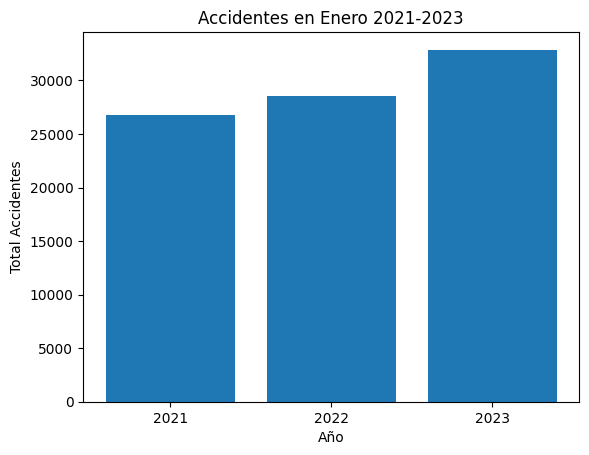

   ANIO  TotalAccidentes
0  2021            26772
1  2022            28573
2  2023            32867


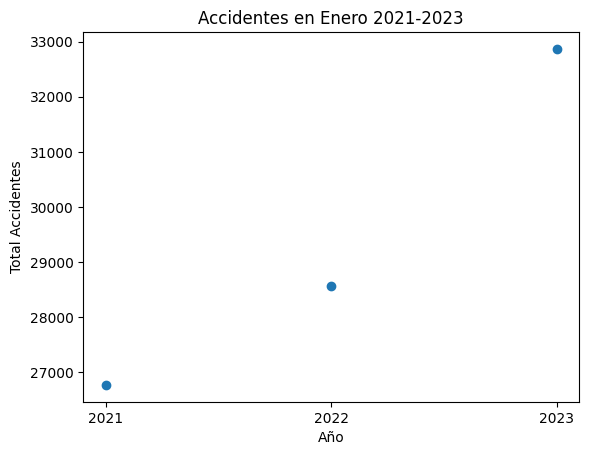

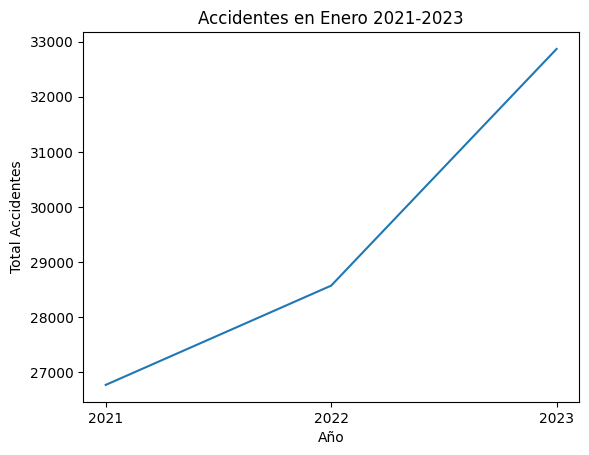

In [255]:
#Caracteristicas seleccionadas: Accidentes en el mes de enero del 2021 al 2023

import matplotlib.pyplot as plt
#Histograma
accidentesEnero = DatosUltimosTresAnios[(DatosUltimosTresAnios['MES'] == '01') & (DatosUltimosTresAnios['ANIO'].isin(['2021', '2022', '2023']))]
accidentesEnero = accidentesEnero.groupby('ANIO').size().reset_index(name='TotalAccidentes')
plt.bar(accidentesEnero['ANIO'], accidentesEnero['TotalAccidentes'])
plt.title('Accidentes en Enero 2021-2023')
plt.xlabel('Año')
plt.ylabel('Total Accidentes')
plt.show()
print(accidentesEnero)
#Dispersion
accidentesEnero = DatosUltimosTresAnios[(DatosUltimosTresAnios['MES'] == '01') & (DatosUltimosTresAnios['ANIO'].isin(['2021', '2022', '2023']))]
accidentesEnero = accidentesEnero.groupby('ANIO').size().reset_index(name='TotalAccidentes')
plt.scatter(accidentesEnero['ANIO'], accidentesEnero['TotalAccidentes'])
plt.title('Accidentes en Enero 2021-2023')
plt.xlabel('Año')
plt.ylabel('Total Accidentes')
plt.show()

#Lineas
accidentesEnero = DatosUltimosTresAnios[(DatosUltimosTresAnios['MES'] == '01') & (DatosUltimosTresAnios['ANIO'].isin(['2021', '2022', '2023']))]
accidentesEnero = accidentesEnero.groupby('ANIO').size().reset_index(name='TotalAccidentes')
plt.plot(accidentesEnero['ANIO'], accidentesEnero['TotalAccidentes'])
plt.title('Accidentes en Enero 2021-2023')
plt.xlabel('Año')
plt.ylabel('Total Accidentes')
plt.show()
